# Random Forest

The random forest is a model made up of many decision trees.

Two Functionalities: 
    1. Random sampling of training data points when building trees.
        Bootstrapping : predictions are made by averaging the predictions of each decision tree.  
    2. Random subsets of features considered when splitting nodes.

Hyperparameters:
    1. Bootstrap
    2. Criterion
    3. max_depth
    4. max_features
    5. max_leaf_nodes
    6. min_impurity_decrease
    7. min_impurity_split
    8. n_estimators
    9. min_samples_split

 Time Complexity: 
     1. During training: O(n^2p*trees)
     2. During prediction: O(p*tress)

Random forest vs Decision Tree:
    1. Random forests is a set of multiple decision trees.
    2. Deep decision trees may suffer from overfitting, but random forests prevents overfitting by creating trees on random subsets.
    3. Decision trees are computationally faster.
    4. Random forests is difficult to interpret, while a decision tree is easily interpretable and can be converted to rules.



In [1]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

In [2]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [6]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9111111111111111


In [7]:
#Find important features
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.476670
petal length (cm)    0.400458
sepal length (cm)    0.114375
sepal width (cm)     0.008497
dtype: float64

No handles with labels found to put in legend.


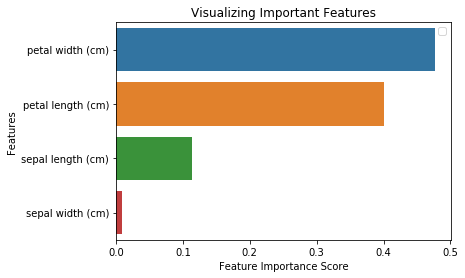

In [8]:
#Visualizing important features
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Advantages:
    1. Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process.
    2. It does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which cancels out the biases.
    3. The algorithm can be used in both classification and regression problems.
    4. Random forests can also handle missing values. There are two ways to handle these: using median values to replace continuous variables, and computing the proximity-weighted average of missing values.
    5. You can get the relative feature importance, which helps in selecting the most contributing features for the classifier.

Disadvantages:
    1. Random forests is slow in generating predictions because it has multiple decision trees. Whenever it makes a prediction, all the trees in the forest have to make a prediction for the same given input and then perform voting on it. This whole process is time-consuming.
    2. The model is difficult to interpret compared to a decision tree, where you can easily make a decision by following the path in the tree.